In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.font_manager as fm
import random as rd

In [2]:
diabetes=datasets.load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [3]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

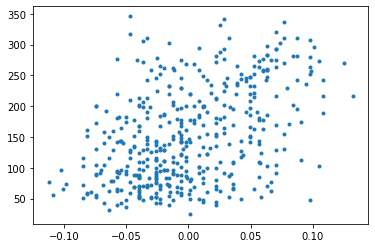

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X_p=diabetes.data[:,3] # 혈압
X_d = diabetes.target # 당뇨 진행 정도
plt.plot(X_p,X_d,'.')

# sklearn을 이용하지 않고

In [5]:
sns.set(style='whitegrid')

In [6]:
X = diabetes.data[:,3]
Y = diabetes.target
G = np.c_[X,Y]
m = G.shape[0]
n = G.shape[1]
K = 9

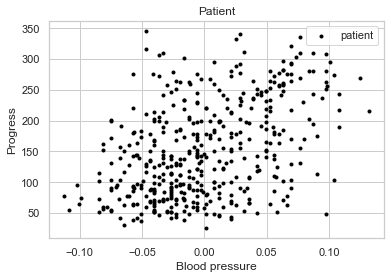

In [7]:
plt.scatter(X,Y,c='black',label='patient',marker='.')
plt.xlabel('Blood pressure')
plt.ylabel('Progress')
plt.legend()
plt.title('Patient')
plt.show()

In [8]:
print(min(G[:,0]))
print(max(G[:,0]))
print(max(G[:,0])-min(G[:,0]))

-0.112399602060758
0.132044217194516
0.244443819255274


In [9]:
print(min(G[:,1]))
print(max(G[:,1]))
print(max(G[:,1])-min(G[:,1]))

25.0
346.0
321.0


In [10]:
Centroids=np.array([]).reshape(n,0)
Centroids
for i in range(K):
    rand=rd.random()
    Centroids = np.c_[Centroids,(((max(G[:,0]) - min(G[:,0])) * rand + min(G[:,0])), max(G[:,1]) * rand - min(G[:,1]))]

In [11]:
Centroids

array([[ 1.27851540e-01,  9.95365314e-03, -8.79533847e-02,
         9.79320478e-03, -1.31583475e-02, -6.05738467e-02,
         6.72943161e-02,  3.31098913e-02, -9.96504561e-02],
       [ 3.15065440e+02,  1.48185914e+02,  9.60259804e+00,
         1.47958806e+02,  1.15471844e+02,  4.83571886e+01,
         2.29349224e+02,  1.80962601e+02, -6.95411722e+00]])

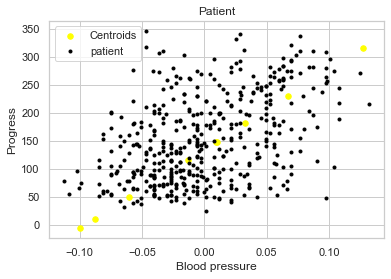

In [12]:
plt.scatter(Centroids[0,:],Centroids[1,:],s=30,c='yellow',label='Centroids')
plt.scatter(X,Y,c='black',label='patient',marker='.')
plt.xlabel('Blood pressure')
plt.ylabel('Progress')
plt.legend()
plt.title('Patient')
plt.show()

In [13]:
Output={}

In [14]:
EuclidianDistance=np.array([]).reshape(m,0)
EuclidianDistance

array([], shape=(442, 0), dtype=float64)

In [15]:
for k in range(K):
    tempDist=np.sum((G-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
EuclidianDistance

array([[2.69174800e+04, 7.91922119e+00, 1.99932373e+04, ...,
        6.13860294e+03, 8.97757556e+02, 2.49495179e+04],
       [5.76314394e+04, 5.35617935e+03, 4.27682398e+03, ...,
        2.38236917e+04, 1.12280762e+04, 6.71648271e+03],
       [3.02987954e+04, 5.16376064e+01, 1.72652840e+04, ...,
        7.80559068e+03, 1.59701094e+03, 2.18904296e+04],
       ...,
       [3.35129677e+04, 2.61983871e+02, 1.49811351e+04, ...,
        9.47687388e+03, 2.39733650e+03, 1.93082604e+04],
       [9.03745399e+03, 5.15726300e+03, 4.42670747e+04, ...,
        8.74123527e+01, 1.52391958e+03, 5.15081815e+04],
       [6.65978153e+04, 8.31487929e+03, 2.24651376e+03, ...,
        2.97042771e+04, 1.53667394e+04, 4.09012944e+03]])

In [16]:
np.argmin(EuclidianDistance,axis=1)
C=np.argmin(EuclidianDistance,axis=1)+1

In [19]:
L={}
for k in range(K):
    L[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    L[C[i]]=np.c_[L[C[i]],G[i]]
for k in range(K):
    L[k+1]=L[k+1].T
for k in range(K):
     Centroids[:,k]=np.mean(L[k+1],axis=0)
Output=L

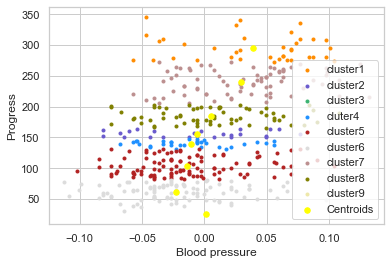

In [20]:
color=['darkorange','slateblue','mediumseagreen','dodgerblue','firebrick','gainsboro','rosybrown', 'olive', 'palegoldenrod']
labels=['cluster1','cluster2','cluster3','cluter4','cluster5','cluster6','cluster7','cluster8','cluster9']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k],marker = '.')
plt.scatter(Centroids[0,:],Centroids[1,:],s=30,c='yellow',label='Centroids')
plt.xlabel('Blood pressure')
plt.ylabel('Progress')
plt.legend()
plt.show()

# sklearn을 이용해서

In [21]:
kmeans = KMeans(n_clusters = 5)
data = np.transpose([diabetes.data[:,3],diabetes.target])
kmeans.fit(data)
center = kmeans.cluster_centers_

Centeroid [[-3.37536343e-03  1.57867347e+02]
 [ 1.91746944e-02  2.18168831e+02]
 [-2.21354956e-02  6.06734694e+01]
 [ 3.81156424e-02  2.81476923e+02]
 [-1.39798466e-02  1.03182692e+02]]


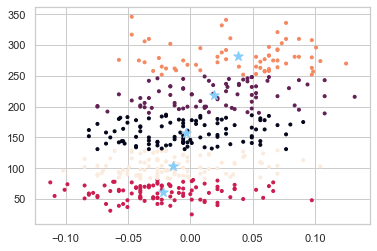

In [22]:
plt.scatter(diabetes.data[:,3],diabetes.target,c=kmeans.labels_,marker='.')
plt.scatter(center[:,0],center[:,1],marker ='*',color = 'lightskyblue',s=100)
print("Centeroid", center)

# cluster 수를 결정하는 좋은 방법을 고안하여 적용해보아라.

엘보우 기법은 Cluster의 수가 늘어날 수록 Centeroid간의 거리가 짧아 지는 것을 이용한 그래프를 통해서 K를 선택하는 기법으로 Cluster의 개수가 늘때 마다 평균값이 급격하게 감소하게 되는데 이 때 그래프의 모습이 팔꿈치의 모습과 같아 엘보우 기법으로 불린다. sklearn에서는 K-means 학습시에 inertia_ 속성에 계산 및 적용되므로 이를 그래프로 그리면 최적의 K값을 알 수 있다.

In [26]:
kiner = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    kiner[k] = kmeans.inertia_

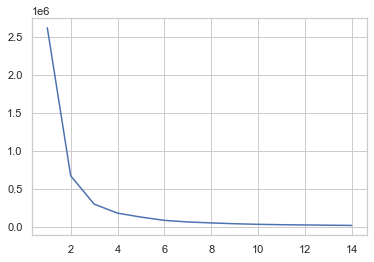

In [27]:
plt.plot(list(kiner.keys()), list(kiner.values()))

Centeroid [[-2.47756268e-03  1.62564626e+02]
 [ 3.45582479e-02  2.60630631e+02]
 [-1.88682815e-02  7.83478261e+01]]


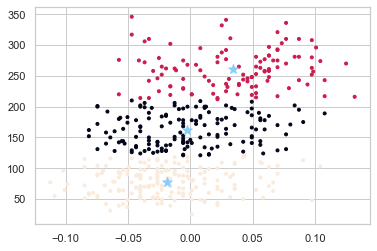

In [28]:
kmeans = KMeans(n_clusters = 3)
data = np.transpose([diabetes.data[:,3],diabetes.target])
kmeans.fit(data)
plt.scatter(diabetes.data[:,3],diabetes.target,c=kmeans.labels_,marker='.')
center = kmeans.cluster_centers_
plt.scatter(center[:,0],center[:,1],marker ='*',color = 'lightskyblue',s=100)
print("Centeroid", center)